Hands-on Time Series Analysis With Python From Basics To Bleeding Edge Techniques 

by B. V. Vishwas, Ashish Patel
https://github.com/Apress/hands-on-time-series-analylsis-python/tree/master

Chapter 1. 
---

Time-Series Characteristics
---

**>> Тренд (тенденция)**

1. Тренд
2. Detecting Trend Using Differencing
3. Detrending using Scipy Signal
4. Detrending using HP Filter (Hodrick-Prescott Filter)

**>> Сезонность**

5. Multi Month-wise Box Plot
6. Autocorrelation plot for seasonality
7. Deseasoning Time series

**>> Циклические вариации**

8. Detecting cyclical variation

**>> Декомпозиция временного ряда на его главные компоненты**

9. Decompose Time series

Временные ряды содержат четыре главные компоненты:
---
+ **Level**  (уровень): среднее значение данных временного ряда
+ **Trend** (тренд): увеличение или уменьшение значения временного ряда
+ **Seasonality** (сезонность): наличие сезонного повторения (паттерна) в данных
+ **Noise** (шум): случайное отклонение в данных временных рядов

# >> Тренд (тенденция)
---
+ Detecting Trend Using a Hodrick-Prescott Filter
+ Detrending a Time Series

## 1. Тренд


+ Тренд (Тенденция) — это закономерность, которая наблюдается в течение определенного периода времени и представляет собой **среднюю скорость изменения во времени**. 
+ Тенденция обычно показывает тенденцию данных к увеличению/восходящему тренду или уменьшению/нисходящему тренду в долгосрочной перспективе. 

Пример выделения тренда с помощью фильтра Ходрика-Прескотта
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.filters.hp_filter import hpfilter

In [2]:
file = 'dataset/India_Exchange_Rate_Dataset.xls'
df = pd.read_excel(file, index_col=0, parse_dates=True)
df.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


In [3]:
exinus_cycle, exinus_trend = hpfilter(df['EXINUS'], lamb=1600)
display('exinus_cycle', exinus_cycle.head())
display('exinus_trend', exinus_trend.head())

'exinus_cycle'

observation_date
1973-01-01    0.432559
1973-02-01    0.164475
1973-03-01   -0.060879
1973-04-01   -0.079877
1973-05-01   -0.153053
Name: EXINUS_cycle, dtype: float64

'exinus_trend'

observation_date
1973-01-01    7.571541
1973-02-01    7.589325
1973-03-01    7.607379
1973-04-01    7.626077
1973-05-01    7.645753
Name: EXINUS_trend, dtype: float64

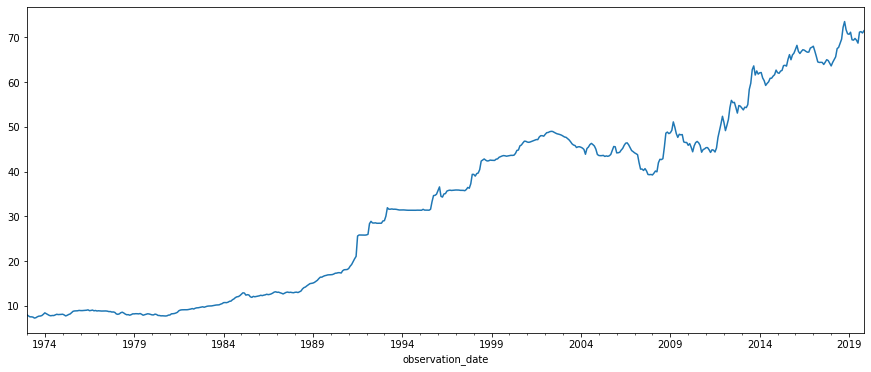

In [4]:
df['EXINUS'].plot(figsize=(15,6)).autoscale(axis='x', tight=True)

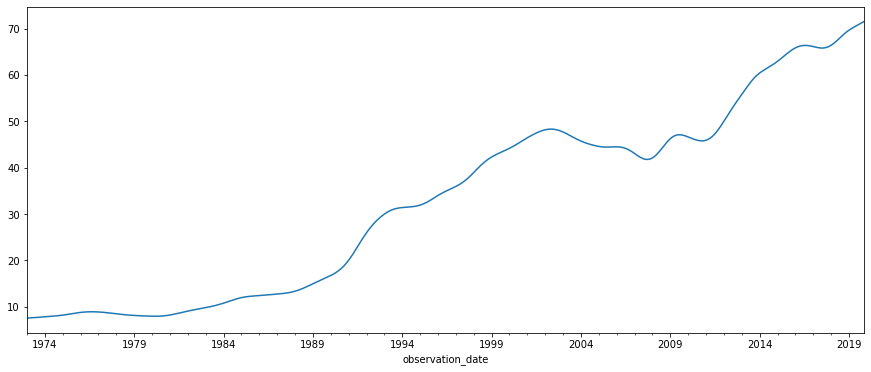

In [5]:
exinus_trend.plot(figsize=(15,6)).autoscale(axis='x', tight=True)

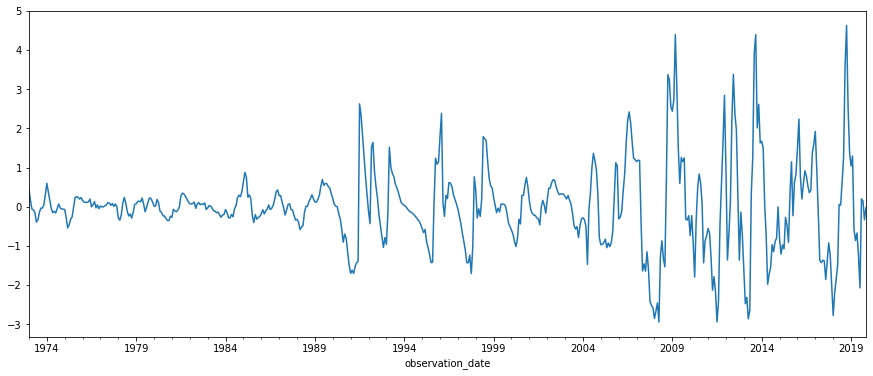

In [6]:
exinus_cycle.plot(figsize=(15,6)).autoscale(axis='x', tight=True)

Detrendning a Time Series
---
Методы удаления тренда из временных рядов:
+ Pandas differencing
+ SciPy signal
+ HP Filter (фильтр Ходрика-Пресскотта)


### 2. Detecting Trend Using Differencing
+ `diff()` - функция Pandas для расчета разниц (удаления тренда

In [7]:
df['EXINUS'].head()

observation_date
1973-01-01    8.0041
1973-02-01    7.7538
1973-03-01    7.5465
1973-04-01    7.5462
1973-05-01    7.4927
Name: EXINUS, dtype: float64

In [8]:
diff = df['EXINUS'].diff()
diff.head()

observation_date
1973-01-01       NaN
1973-02-01   -0.2503
1973-03-01   -0.2073
1973-04-01   -0.0003
1973-05-01   -0.0535
Name: EXINUS, dtype: float64

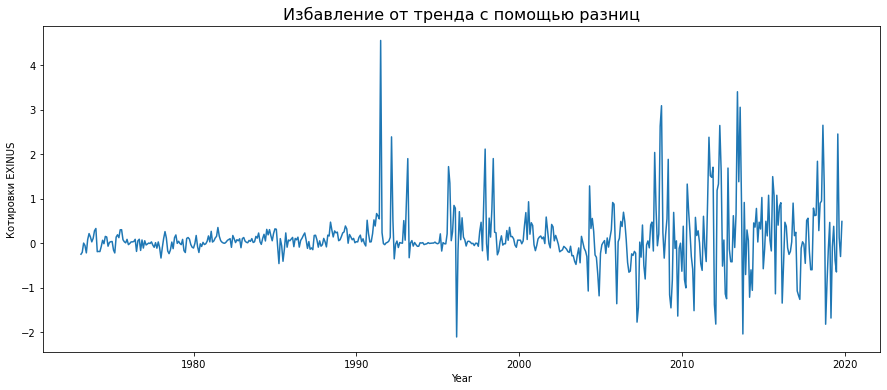

In [9]:
plt.figure(figsize=(15,6))
plt.plot(diff)

plt.title('Избавление от тренда с помощью разниц',
         fontsize=16)

plt.xlabel('Year')
plt.ylabel('Котировки EXINUS')
plt.show()

### 3.Detrending using Scipy Signal

Signal.detrend - модуль SciPy, который используется для удаление линейного тренда

In [10]:
from scipy import signal

In [11]:
df['EXINUS'].values[:5]

array([8.0041, 7.7538, 7.5465, 7.5462, 7.4927])

In [12]:
detrend = signal.detrend(df['EXINUS'].values)

In [13]:
detrend[:5]

array([8.9254116 , 8.5548149 , 8.22721819, 8.10662149, 7.93282479])

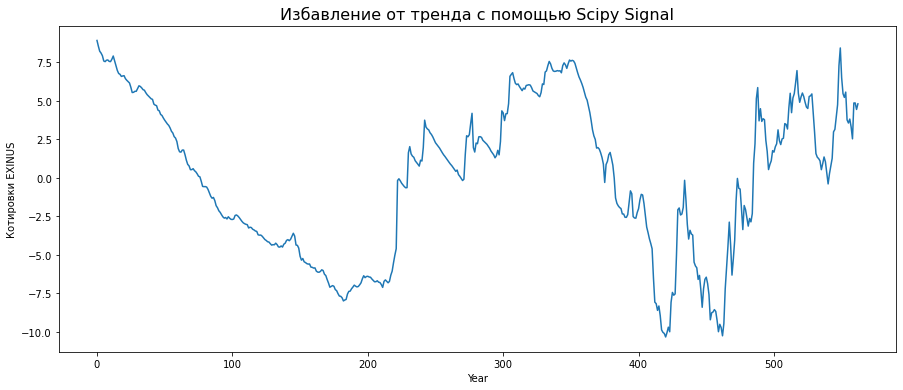

In [14]:
plt.figure(figsize=(15,6))
plt.plot(detrend )

plt.title('Избавление от тренда с помощью Scipy Signal',
         fontsize=16)

plt.xlabel('Year')
plt.ylabel('Котировки EXINUS')
plt.show()

### 4. Detrending using HP Filter

Фильтр Ходрика-Прескотта используется для удаления тренда и сглаживания данных
+ он удаляет краткосрочные флуктуации.

Математически фильтр Ходрика-Прескотта записывается как задача минимизации следующей функции потерь:

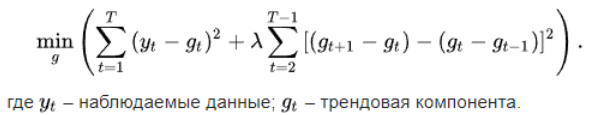

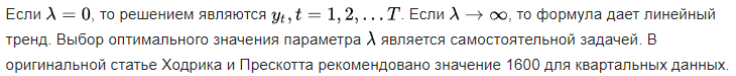


In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [24]:
df.head()

,EXINUS,trend,detrended,exinus_trend,exinus_cycle
observation_date,,,,,
1973-01-01,8.0041,7.571541,0.432559,7.571541,0.432559
1973-02-01,7.7538,7.589325,0.164475,7.589325,0.164475
1973-03-01,7.5465,7.607379,-0.060879,7.607379,-0.060879
1973-04-01,7.5462,7.626077,-0.079877,7.626077,-0.079877
1973-05-01,7.4927,7.645753,-0.153053,7.645753,-0.153053


In [25]:
exinus_cycle, exinus_trend = hpfilter(df['EXINUS'], lamb=1600)

In [26]:
df['trend'] = exinus_trend
df.head()

,EXINUS,trend,detrended,exinus_trend,exinus_cycle
observation_date,,,,,
1973-01-01,8.0041,7.571541,0.432559,7.571541,0.432559
1973-02-01,7.7538,7.589325,0.164475,7.589325,0.164475
1973-03-01,7.5465,7.607379,-0.060879,7.607379,-0.060879
1973-04-01,7.5462,7.626077,-0.079877,7.626077,-0.079877
1973-05-01,7.4927,7.645753,-0.153053,7.645753,-0.153053


In [27]:
df['detrended'] = df['EXINUS'] - df['trend']
df['exinus_cycle'] = exinus_cycle
df.head()

,EXINUS,trend,detrended,exinus_trend,exinus_cycle
observation_date,,,,,
1973-01-01,8.0041,7.571541,0.432559,7.571541,0.432559
1973-02-01,7.7538,7.589325,0.164475,7.589325,0.164475
1973-03-01,7.5465,7.607379,-0.060879,7.607379,-0.060879
1973-04-01,7.5462,7.626077,-0.079877,7.626077,-0.079877
1973-05-01,7.4927,7.645753,-0.153053,7.645753,-0.153053


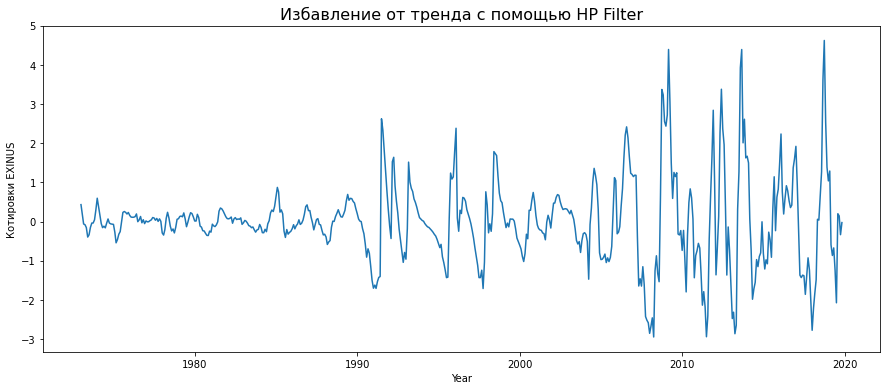

In [28]:
df['trend'] = exinus_trend
df['exinus_cycle'] = exinus_cycle

plt.figure(figsize=(15,6))
plt.plot(df['exinus_cycle'])

plt.title('Избавление от тренда с помощью HP Filter',
         fontsize=16)

plt.xlabel('Year')
plt.ylabel('Котировки EXINUS')
plt.show()

# >> Seasonality (Сезонность)
---
+ Multiple Box Plots
+ Autocorrelation Plot
+ Deseasoning of Time-Series Data
+ Seasonal Decomposition


Сезонность - это периодические флуктуации (колебания), при которых одна и та же закономерность (паттерн) возникает через равные промежутки времени

**Методы для обнаружения сезонности:**
+ Multiple Box Plots
+ Графики автокорреляция (Autocorrelation Plot)

### 5.Multi Month-wise Box Plot

In [33]:
import seaborn as sns

In [34]:
df = pd.read_excel(file, parse_dates=True)
df['year'] = [d.year for d in df['observation_date']]
df['month'] = [d.month for d in df['observation_date']]
df['month_name'] = df['observation_date'].dt.strftime('%b')
df.head()

,observation_date,EXINUS,year,month,month_name
0,1973-01-01,8.0041,1973,1,Jan
1,1973-02-01,7.7538,1973,2,Feb
2,1973-03-01,7.5465,1973,3,Mar
3,1973-04-01,7.5462,1973,4,Apr
4,1973-05-01,7.4927,1973,5,May


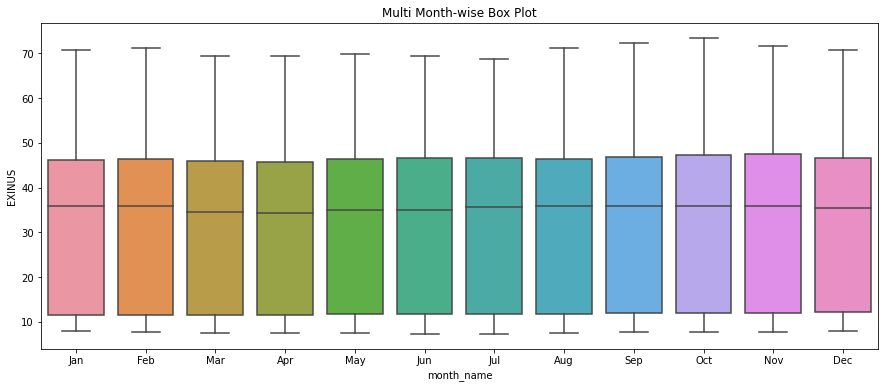

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month_name',
           y='EXINUS',
           data=df).set_title('Multi Month-wise Box Plot')
plt.show()

### 6. Autocorrelation plot for seasonality
---
+ Автокорреляция используется для проверки случайности (randomness) в данных.
+ Например, в случае ежемесячных данных, если существует регулярный сезонный эффект, то мы надеемся увидеть большие пиковые лаги каждые 12 месяцев

In [39]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize': (15,6), 'figure.dpi':220})

In [38]:
df = pd.read_excel(file, index_col=0, parse_dates=True)
df.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


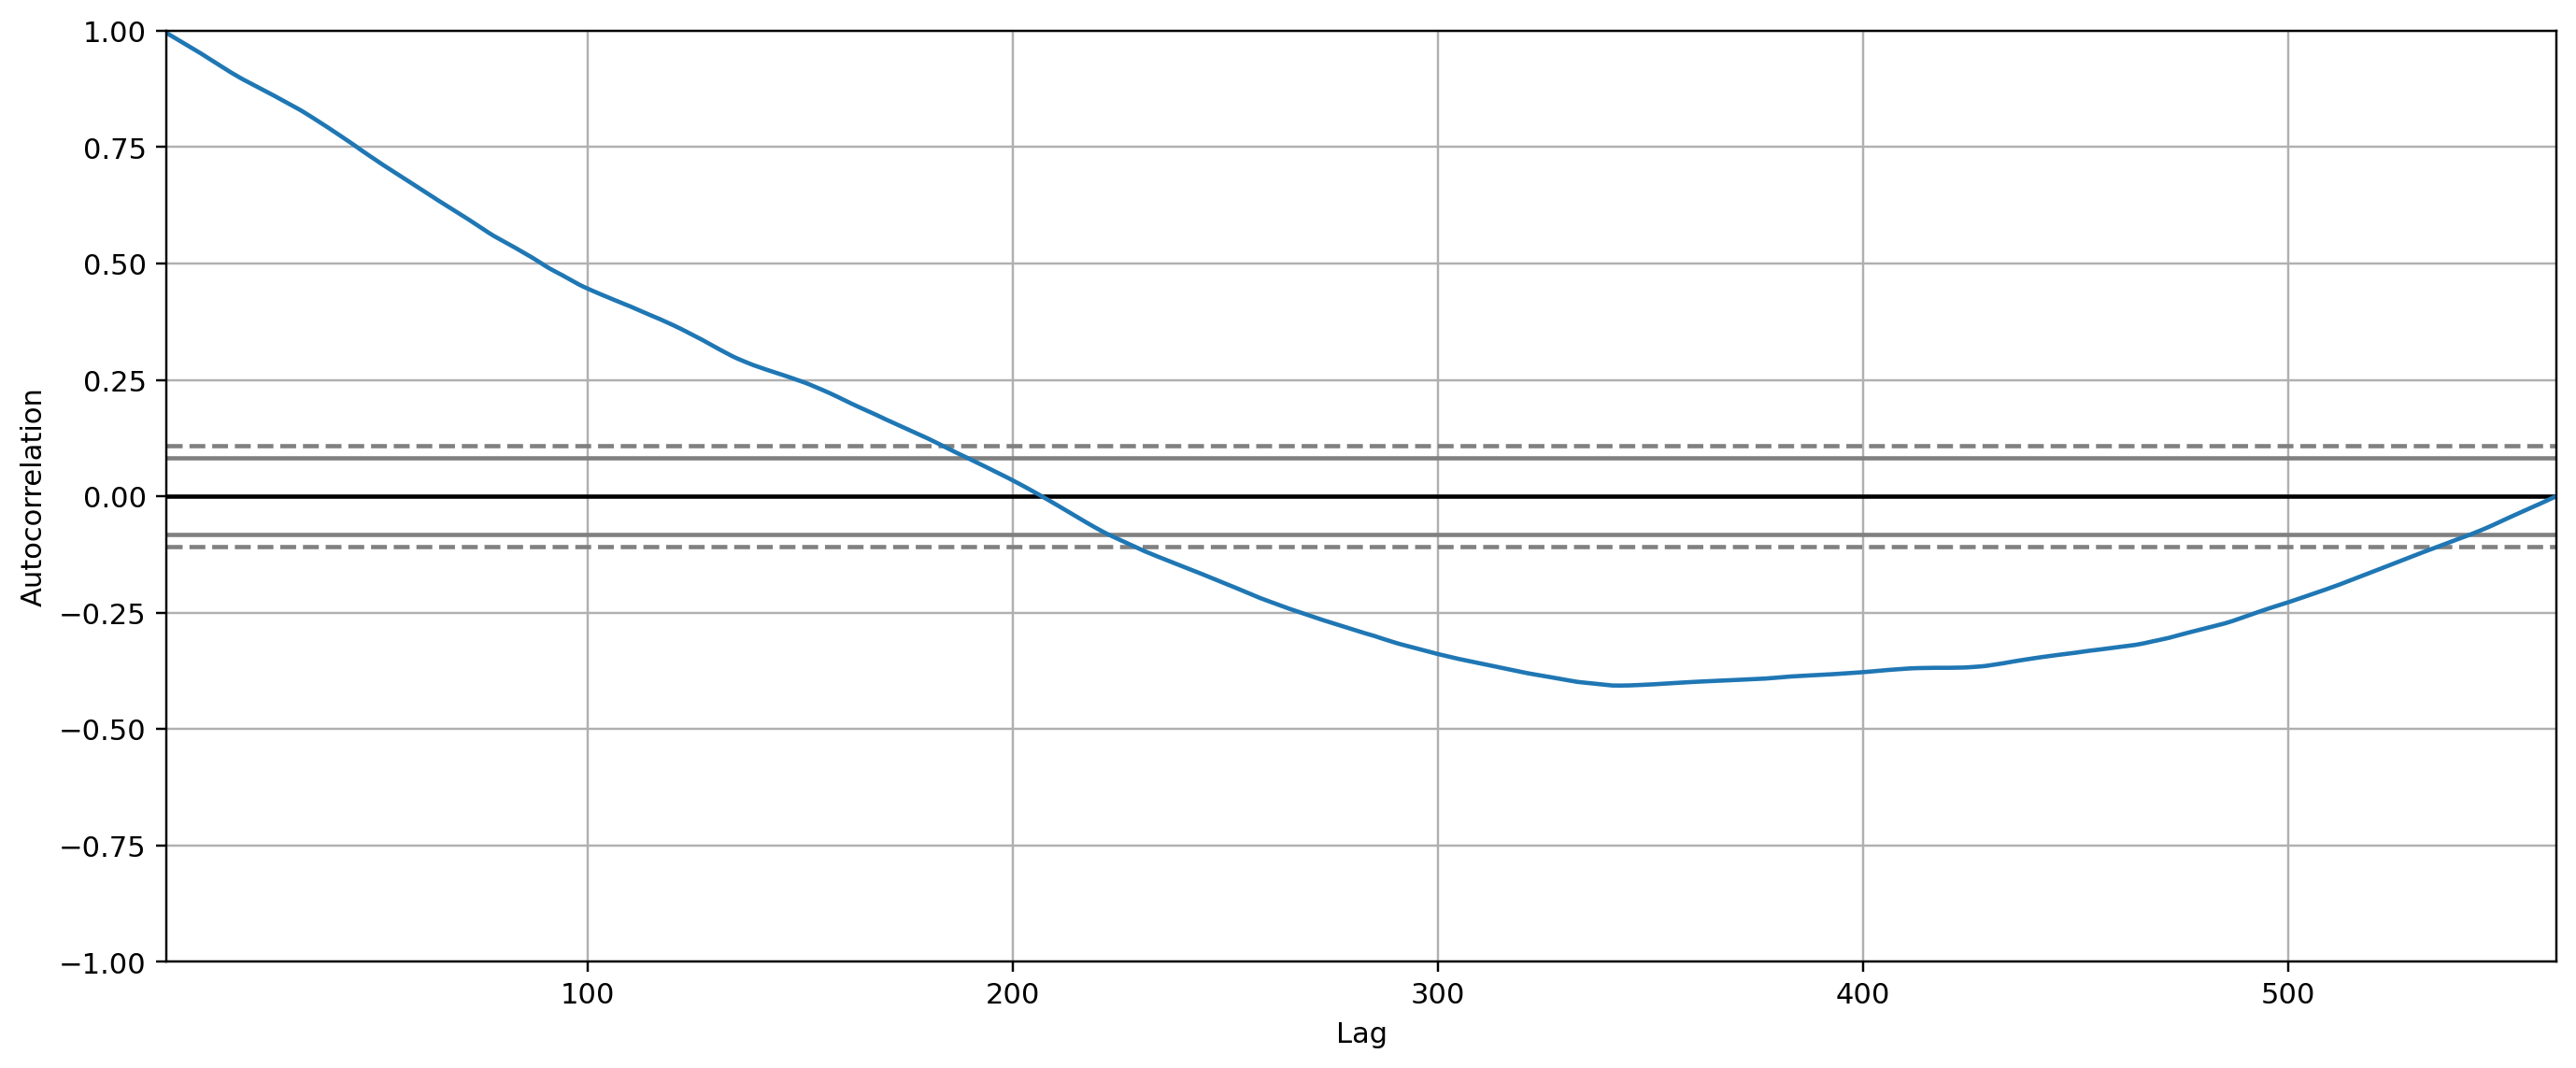

In [45]:
autocorrelation_plot(df['EXINUS'].tolist());

### 7. Deseasoning Time series

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
df = pd.read_excel(file, index_col=0, parse_dates=True)

result_mul = seasonal_decompose(df['EXINUS'],
                                model='multiplicative',
                                extrapolate_trend='freq')

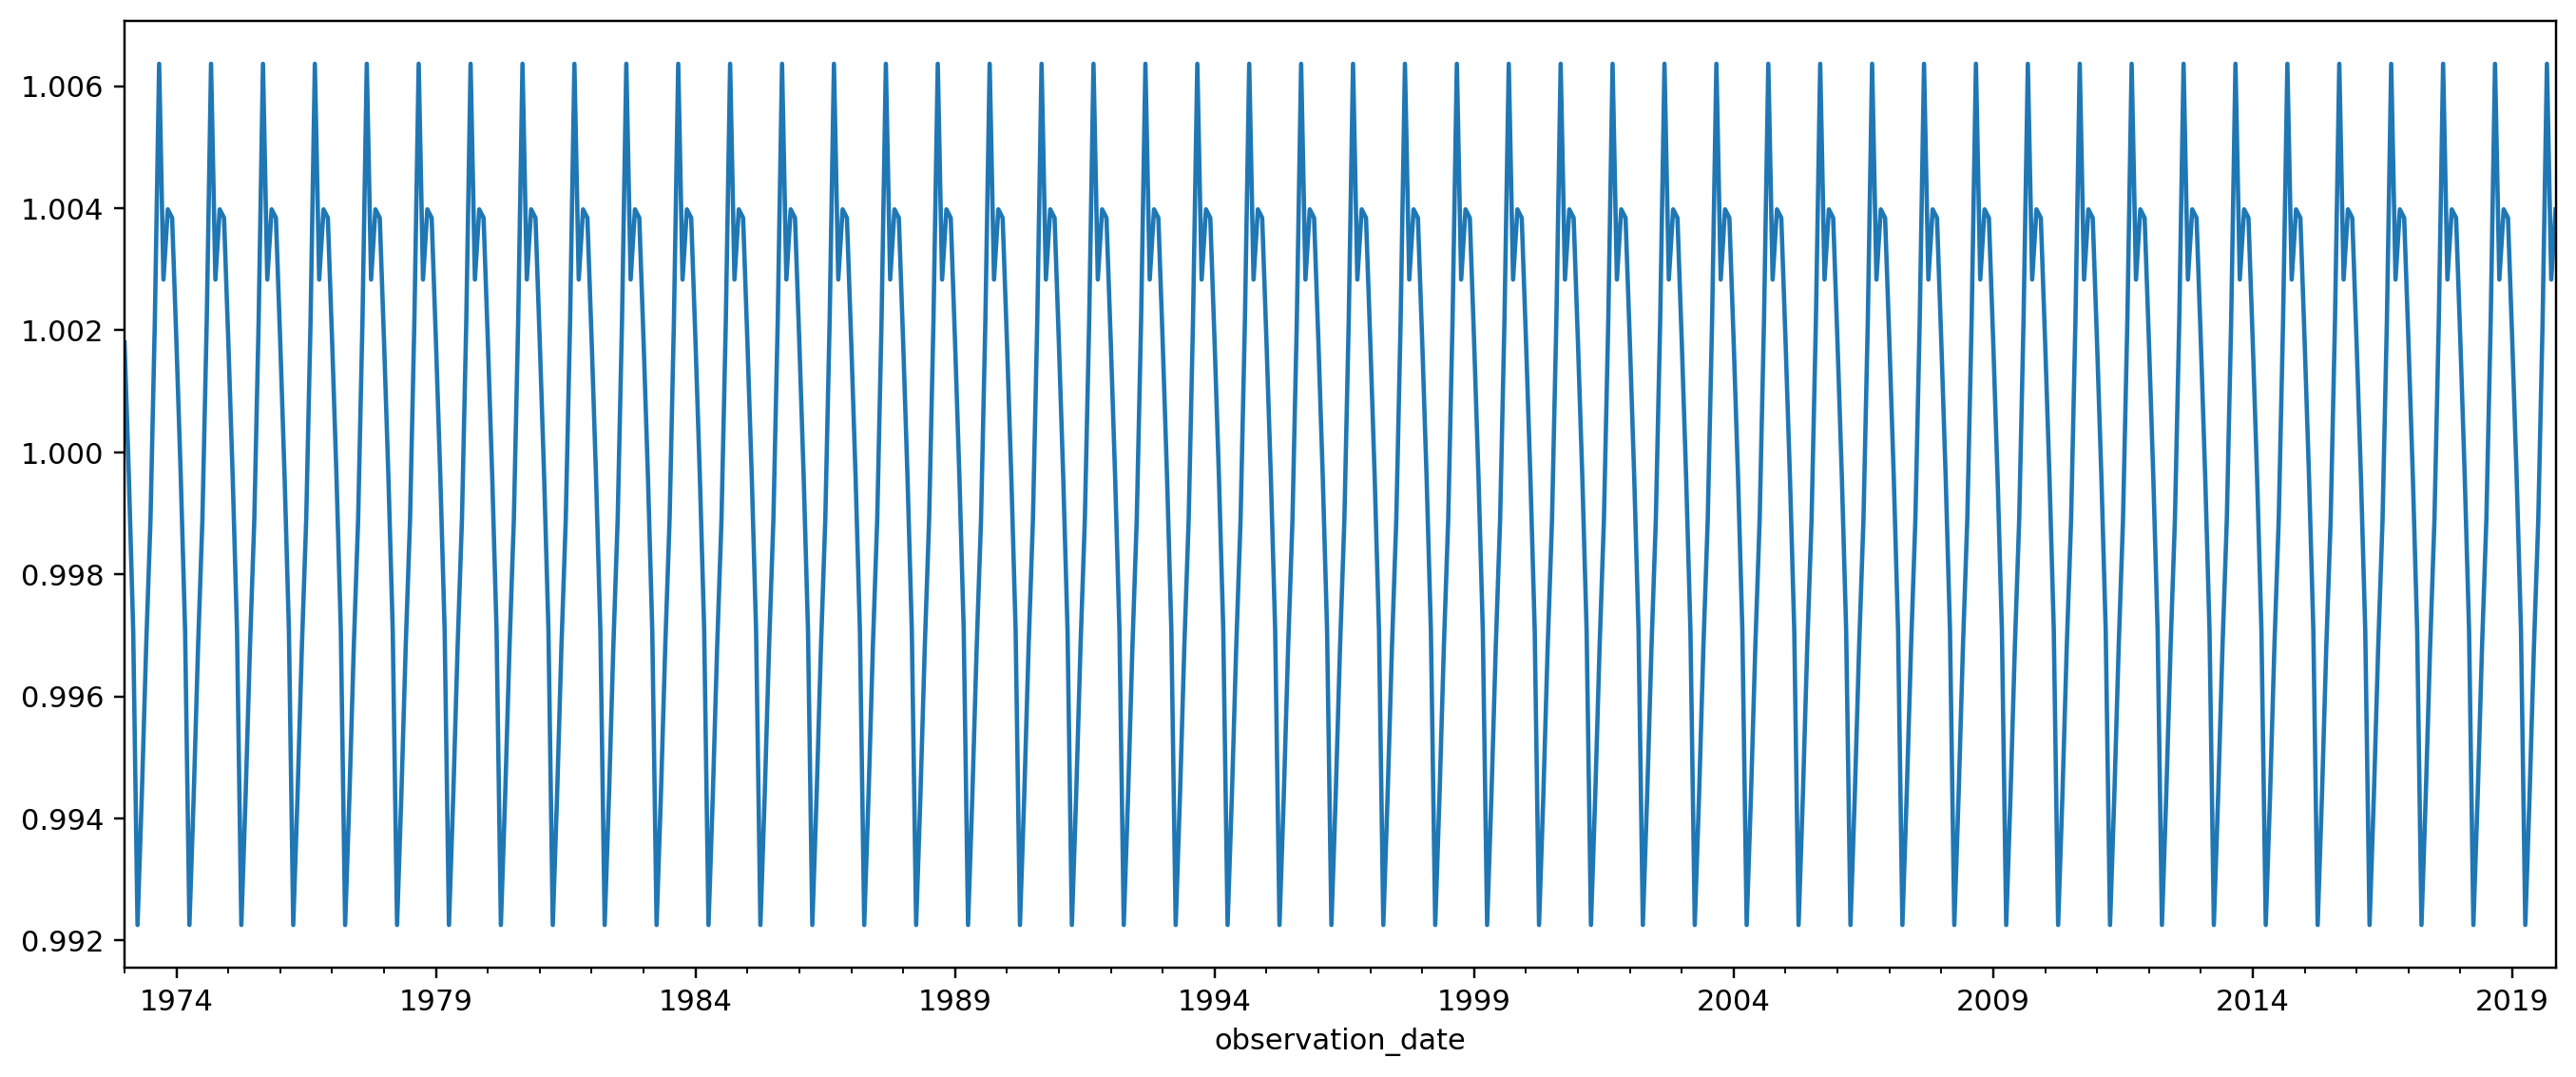

In [53]:
result_mul.seasonal.plot();

In [51]:
deseason = df['EXINUS'] - result_mul.seasonal
deseason

observation_date
1973-01-01     7.002302
1973-02-01     6.754199
1973-03-01     6.549415
1973-04-01     6.553947
1973-05-01     6.498309
                ...    
2019-07-01    67.740205
2019-08-01    70.186963
2019-09-01    70.304632
2019-10-01    70.005768
2019-11-01    70.490219
Length: 563, dtype: float64

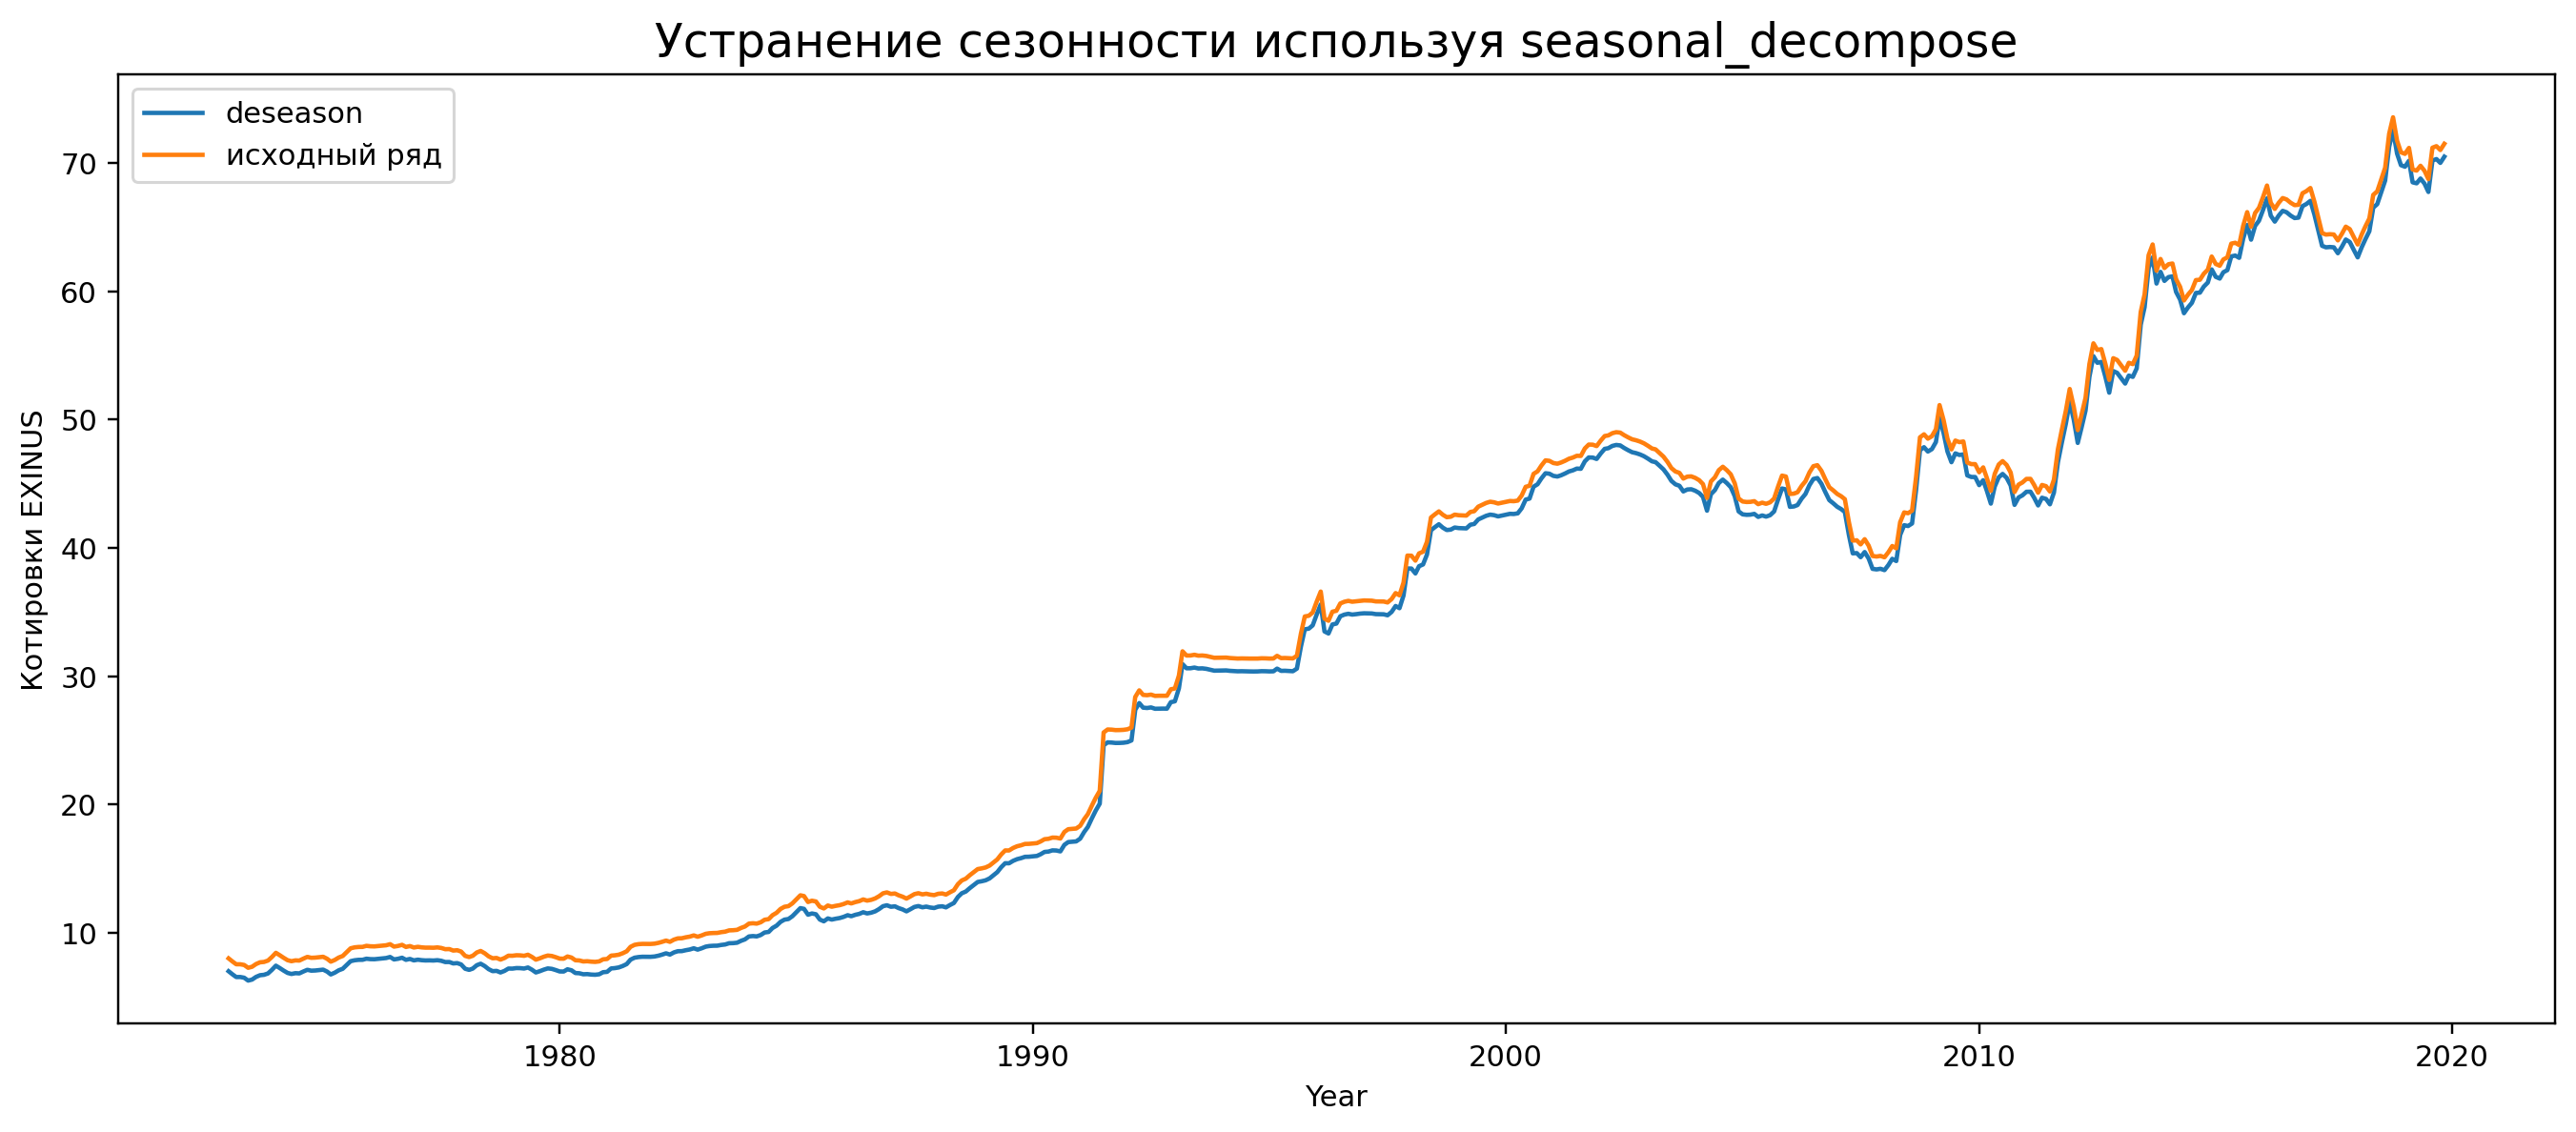

In [56]:
plt.figure(figsize=(15,6))
plt.plot(deseason, label='deseason')
plt.plot(df['EXINUS'], label='исходный ряд')
plt.title('Устранение сезонности используя seasonal_decompose',
         fontsize=16)


plt.legend()
plt.xlabel('Year')
plt.ylabel('Котировки EXINUS')
plt.show()

# >> Циклические вариации (компоненты)

Циклические компоненты - это колебания вокруг долгосрочного тренда, наблюдаемые каждые несколько единиц времени.

Такое поведение встречается реже по сравнению с сезонностью.

Примеры циклических компонент (в экономике):
+ процветание
+ депрессия

### 8. Detecting cyclical variation

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

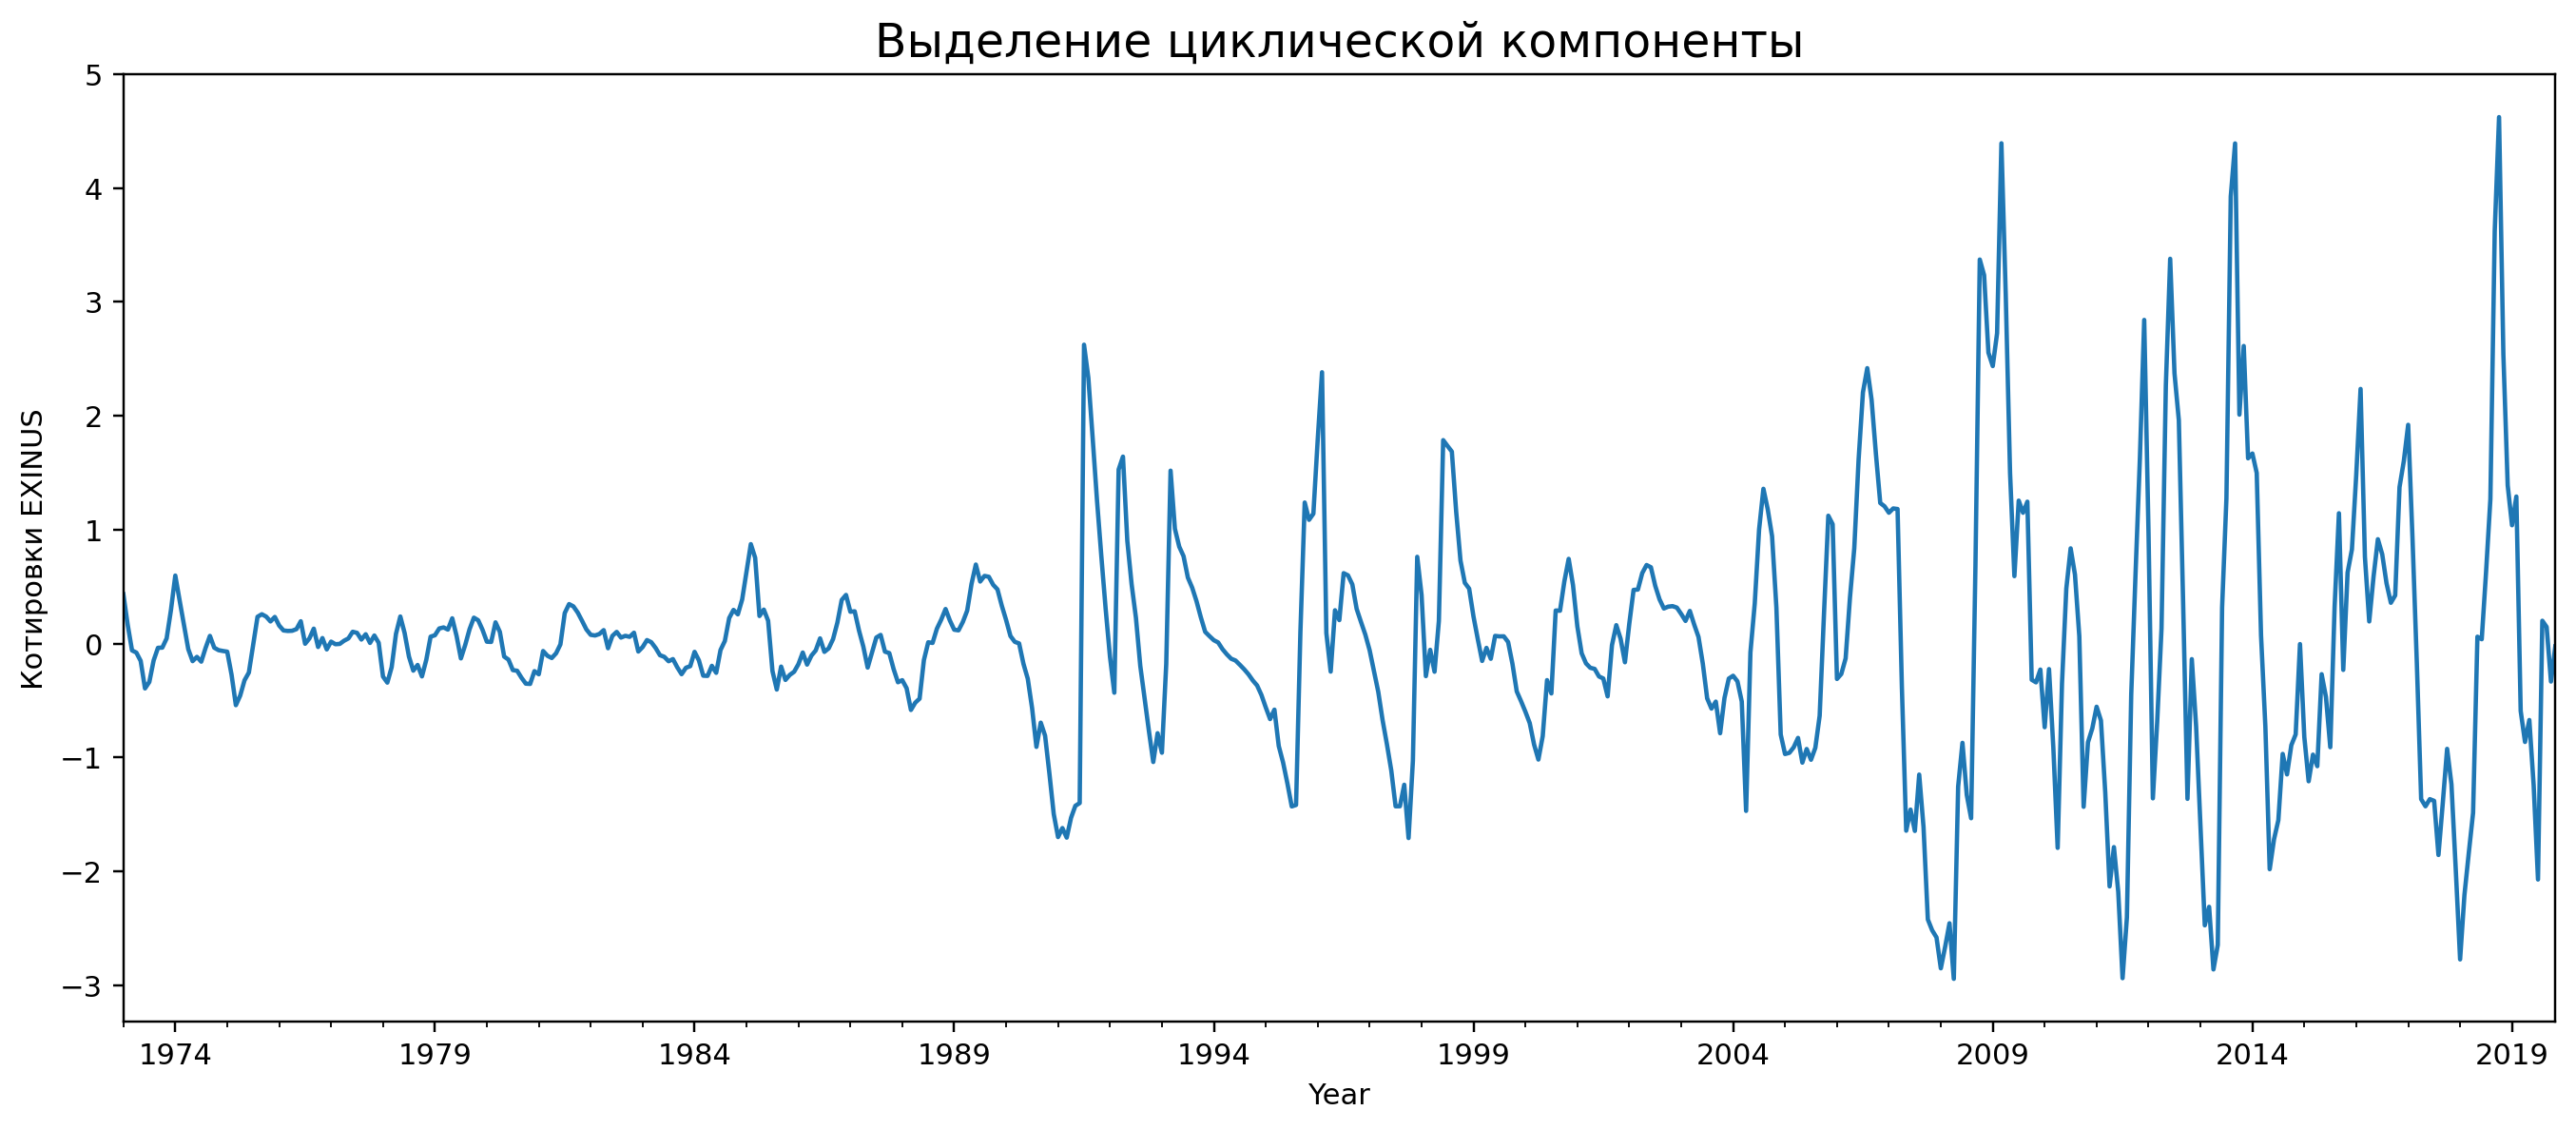

In [58]:
df = pd.read_excel(file, index_col=0, parse_dates=True)
exinus_cycle, exinus_trend = hpfilter(df['EXINUS'], lamb=1600)

df['cycle'] = exinus_cycle
df['trend'] = exinus_trend

df['cycle'].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Выделение циклической компоненты', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Котировки EXINUS')
plt.show()

# >> Декомпозиция временного ряда на его главные компоненты
---

Декомпозиция - это метод, используемый для разделения временного ряда на различные элементы, такие как:
+ Тренд ($T(t)$) - увеличение или уменьшение значений $t_s$ временного ряда
+ Сезонность ($S[t]$) - означает повторяющийся краткосрочный цикл в значениях $t_s$ временного ряда
+ Циклические вариации (дисперсия) ($c[t]$) - означает флуктуации вдоль долгосрочного тренда
+ Остатки ($e[t]$) - нерегулярные изменения в данных

**Адитивная модель** работает с линейными тенденциями во временных рядах:
$$
Y[t] = T[t] + S[t] + c[t] + e[t]
$$

**Мультипликативная модель** работает с нелинейными данными, такими как квадратичные или экспоненциальные:
$$
Y[t] = T[t] \times S[t] \times c[t] \times e[t]
$$


In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

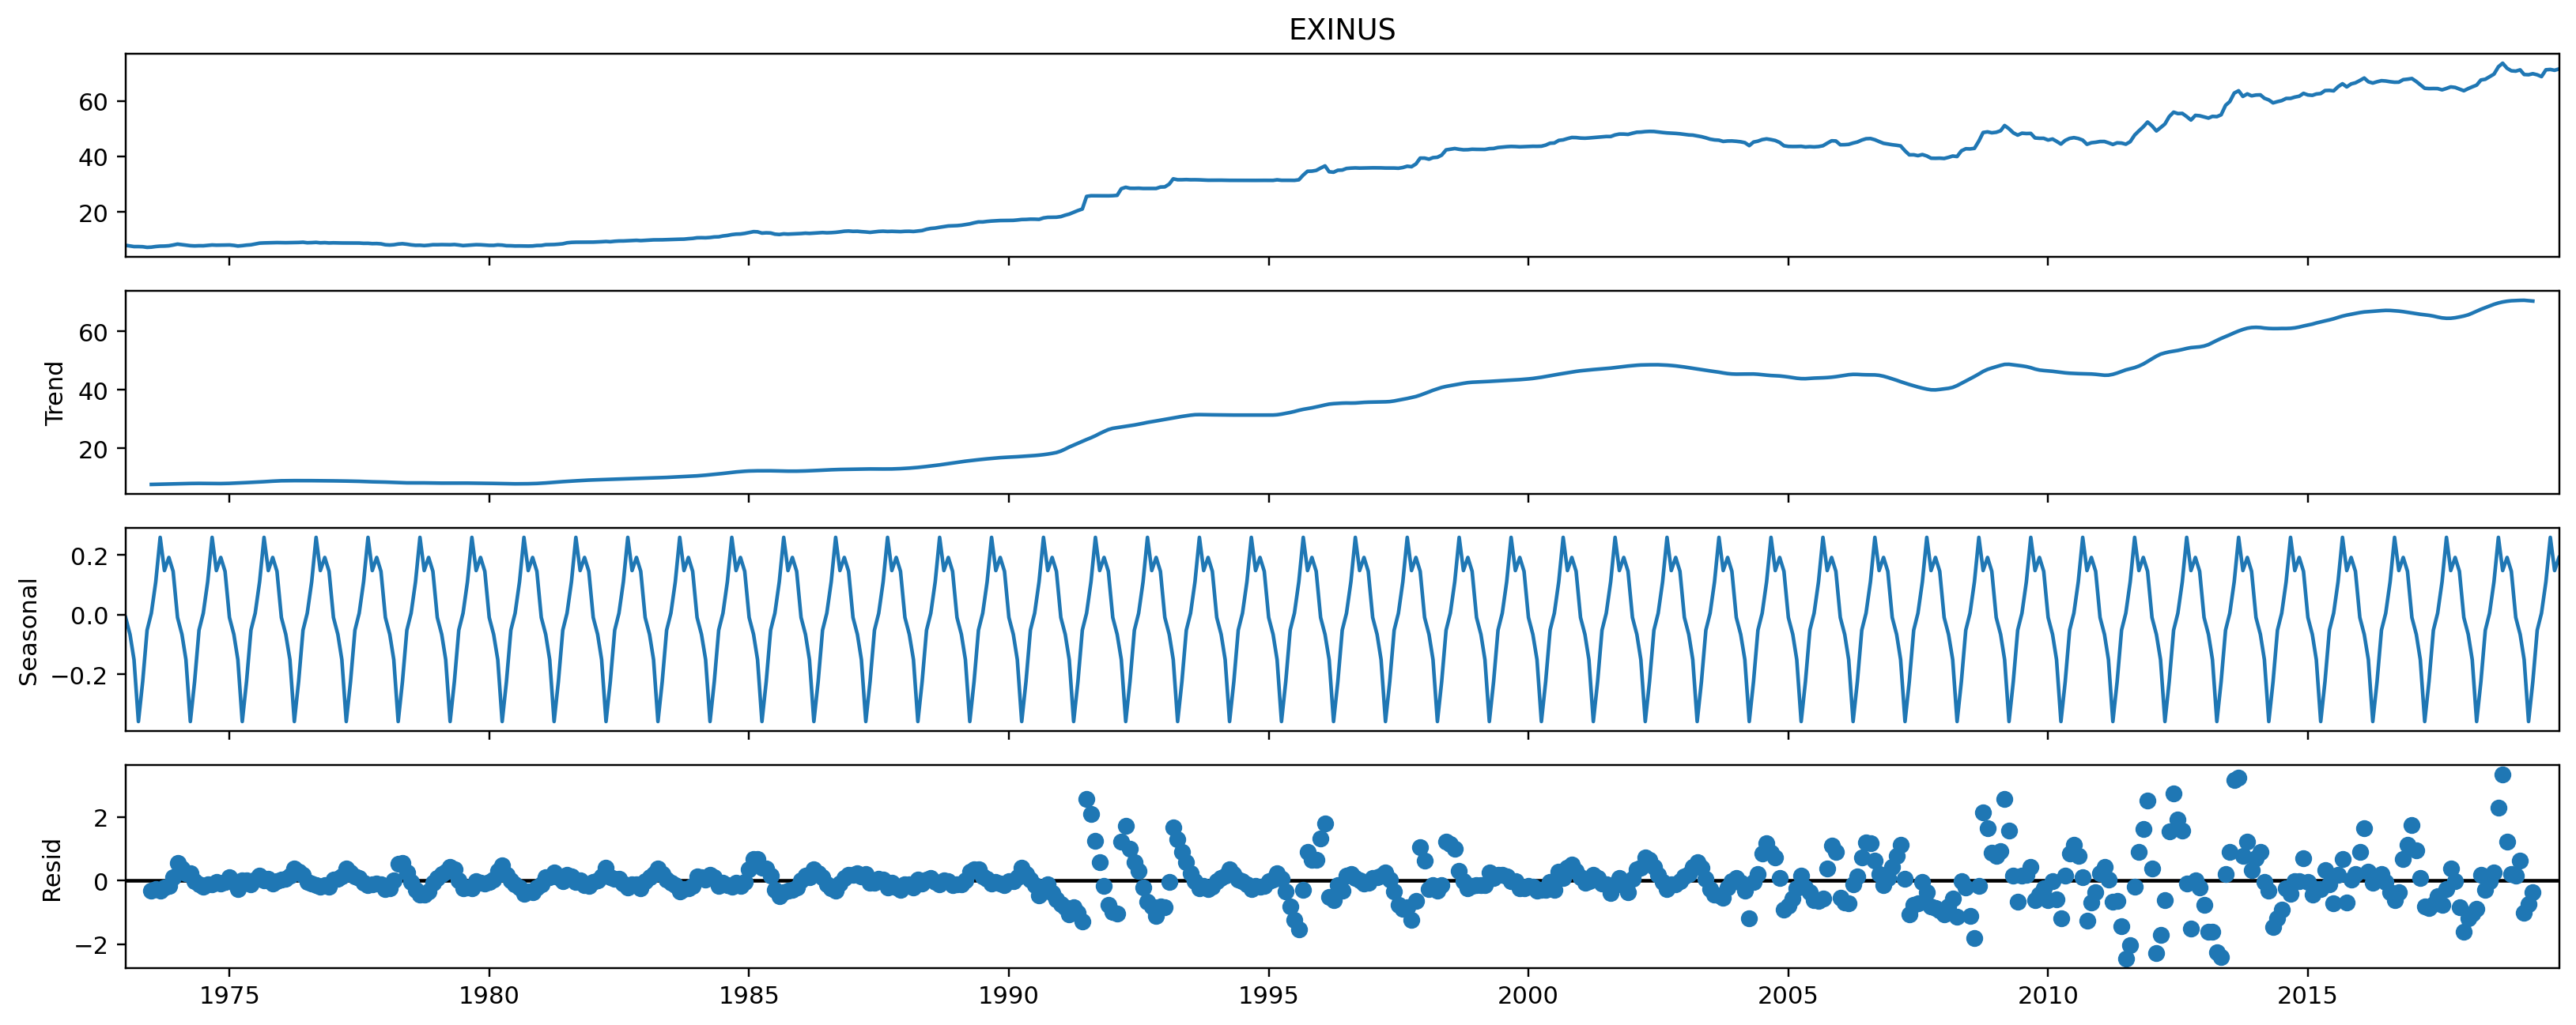

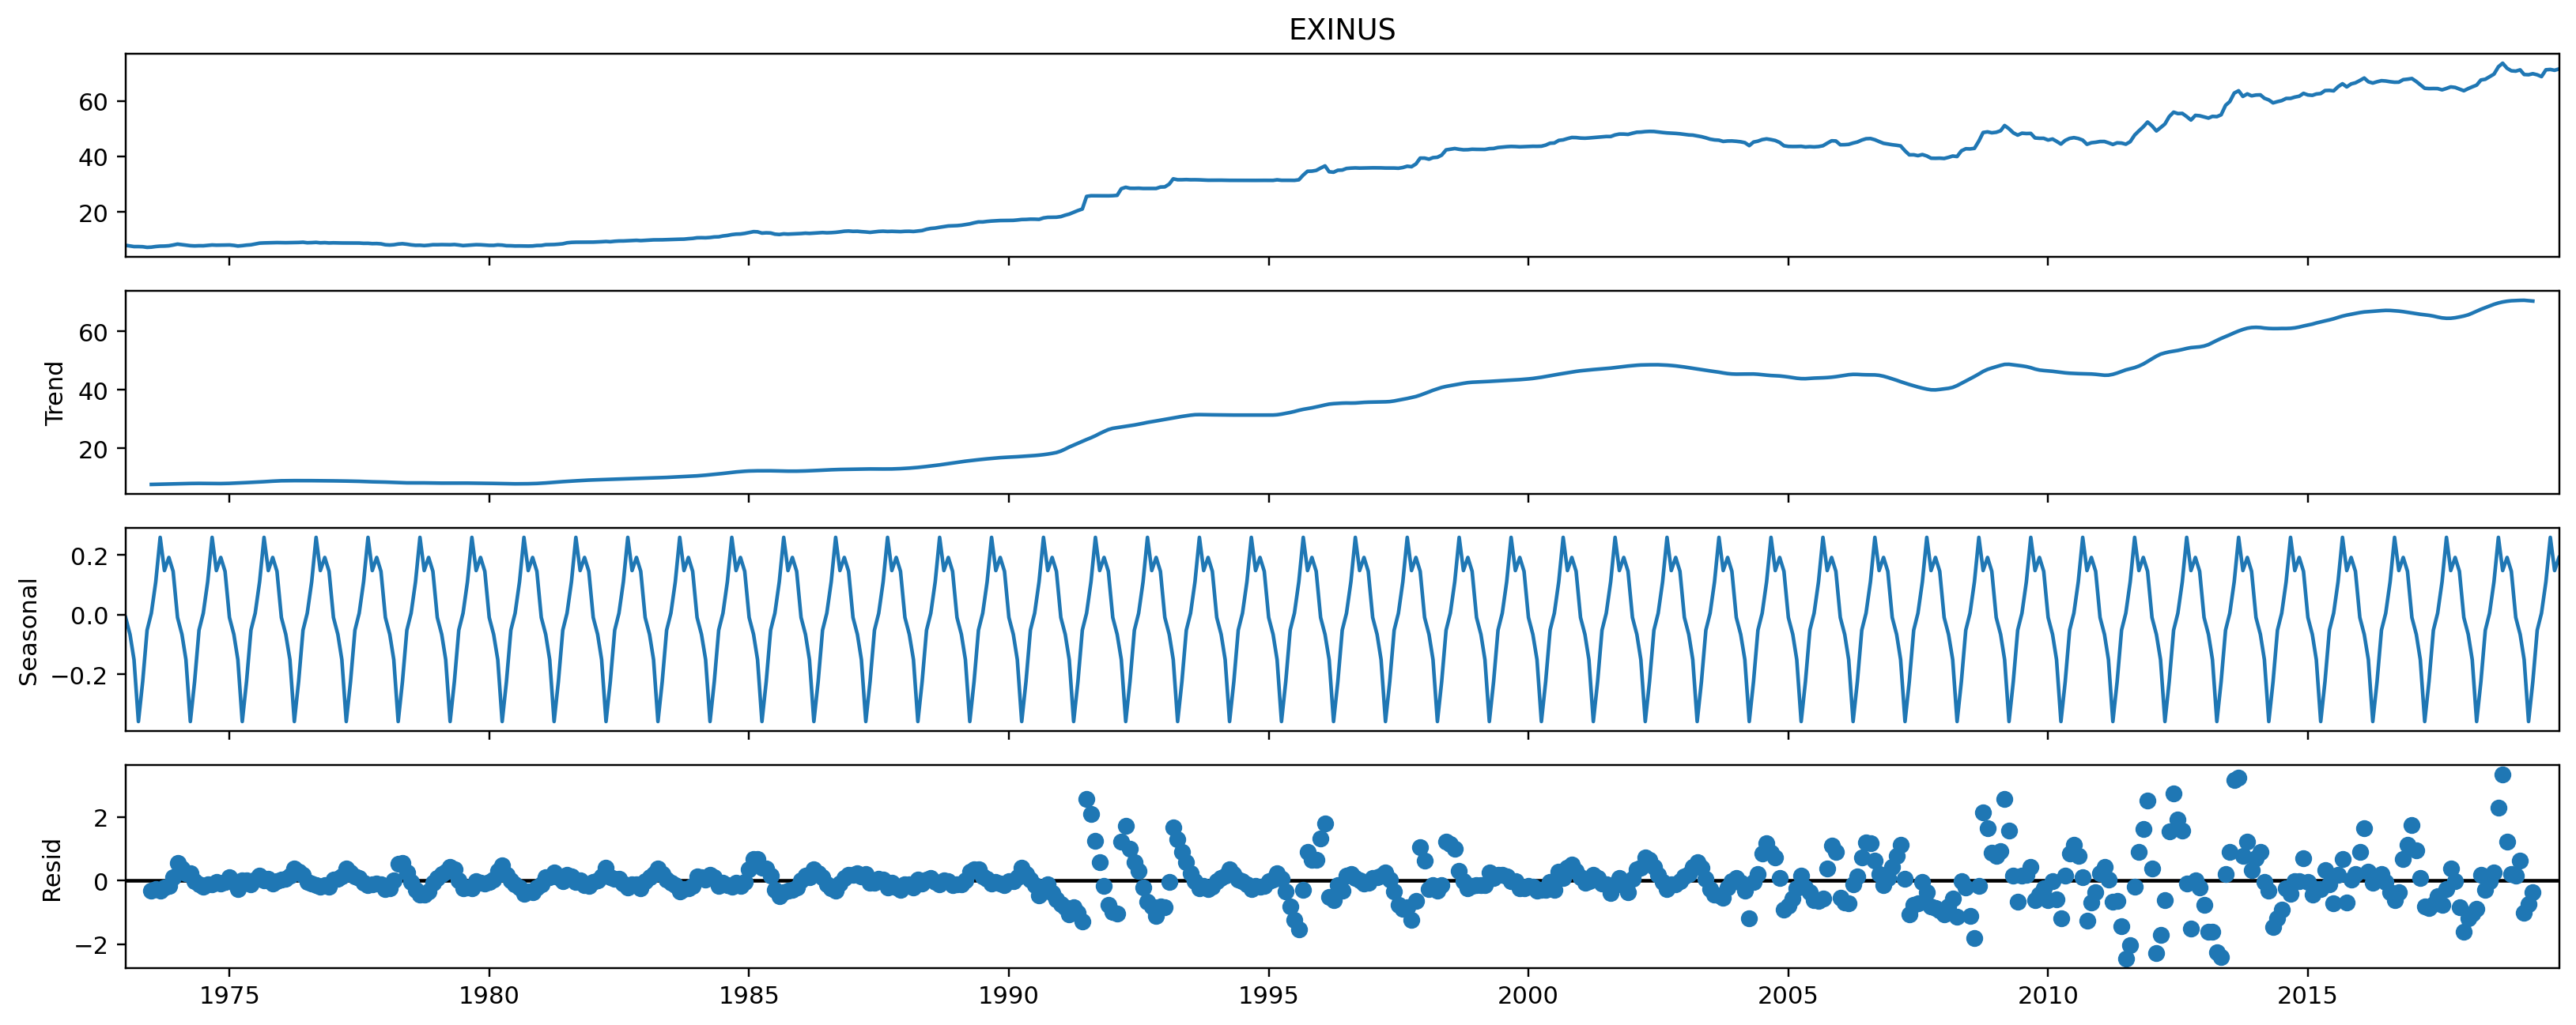

In [65]:
df = pd.read_excel(file, index_col=0, parse_dates=True)

result_additive = seasonal_decompose(df['EXINUS'], model='add')
result_additive.plot()

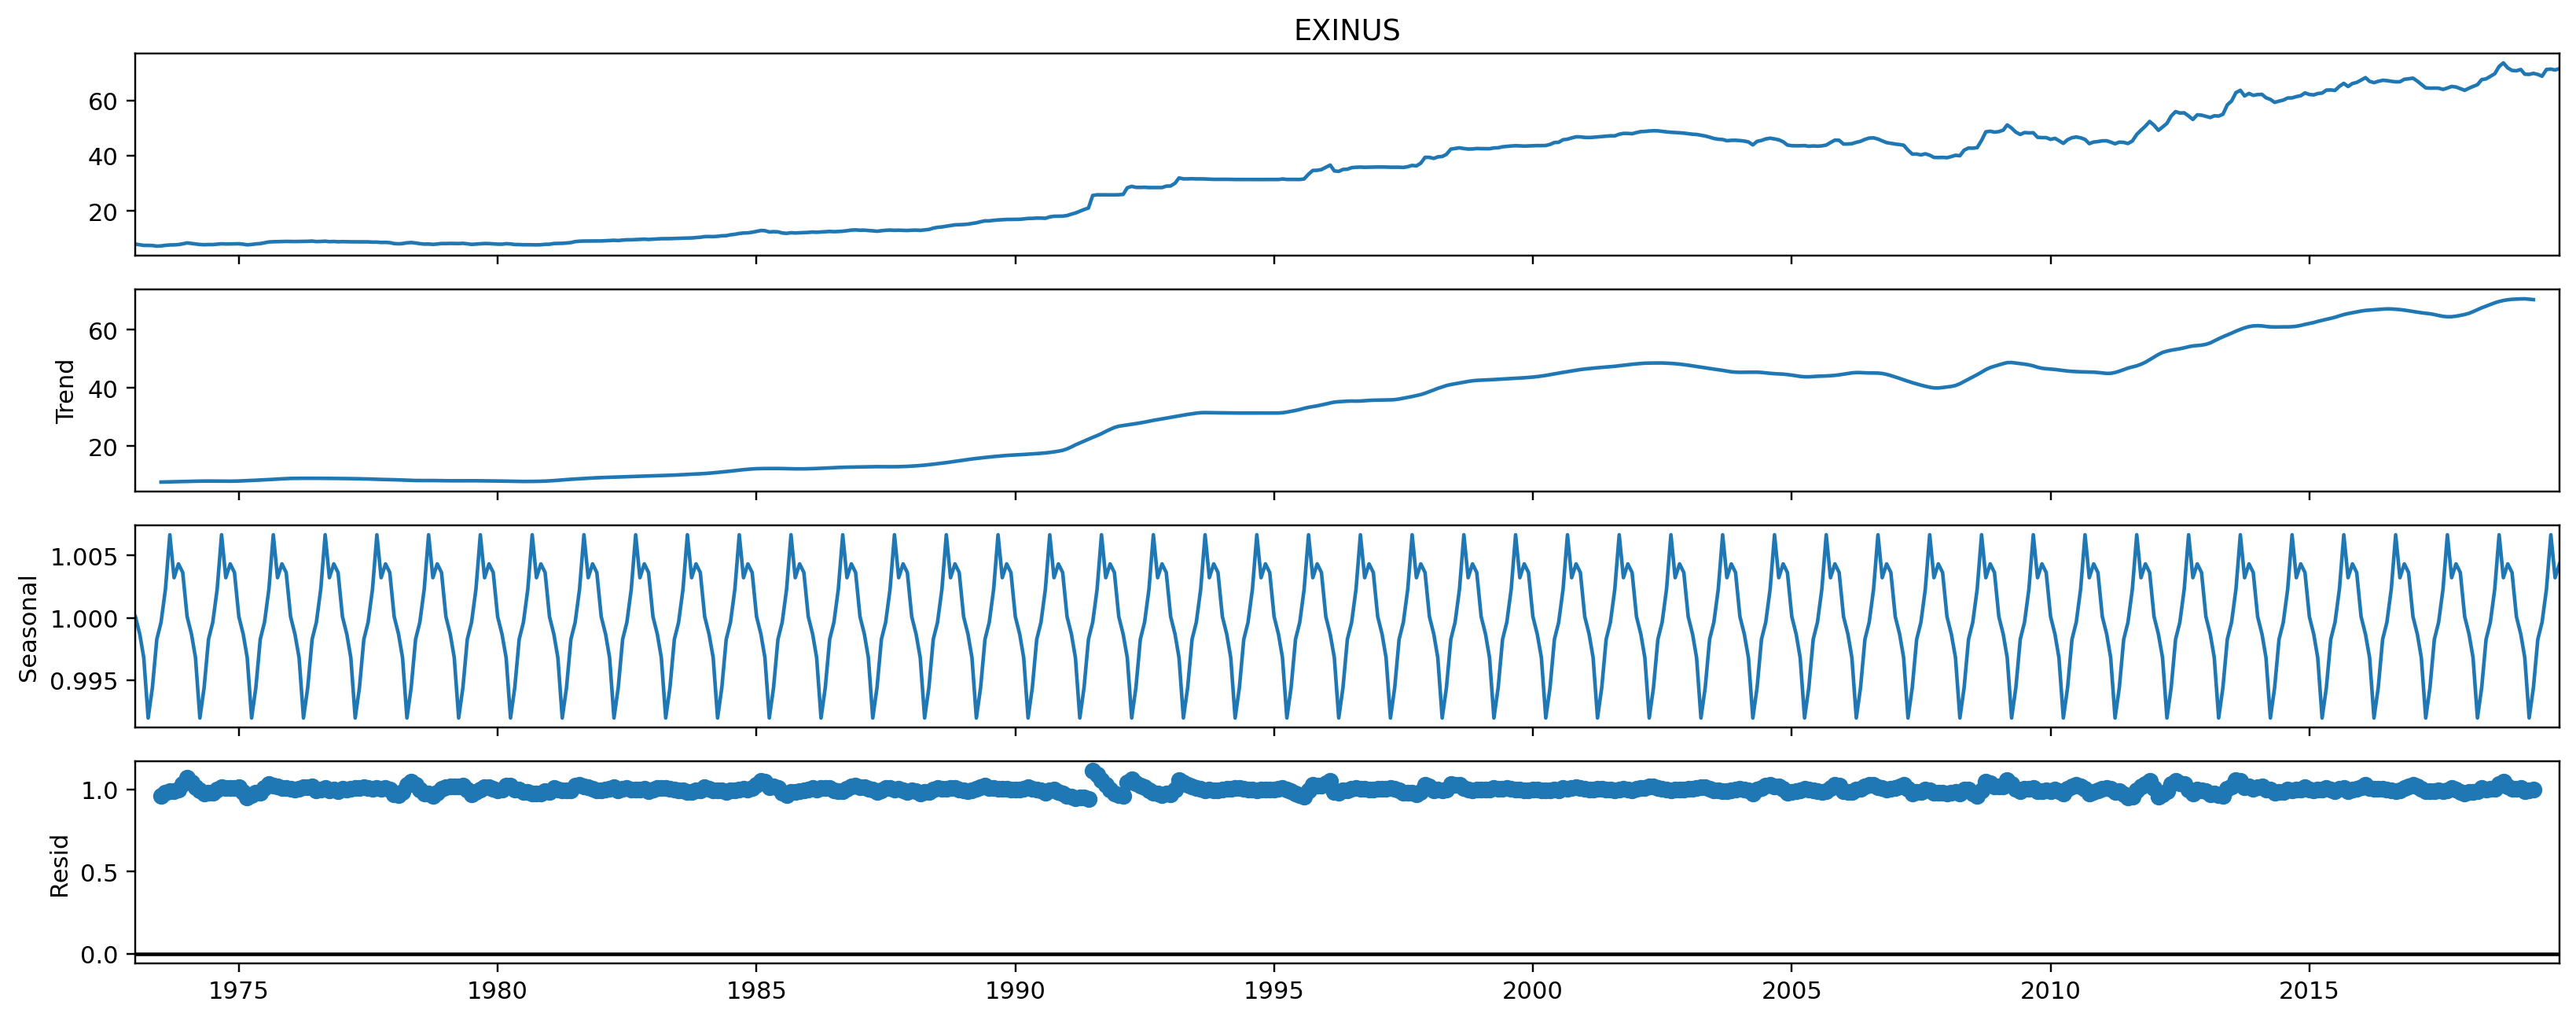

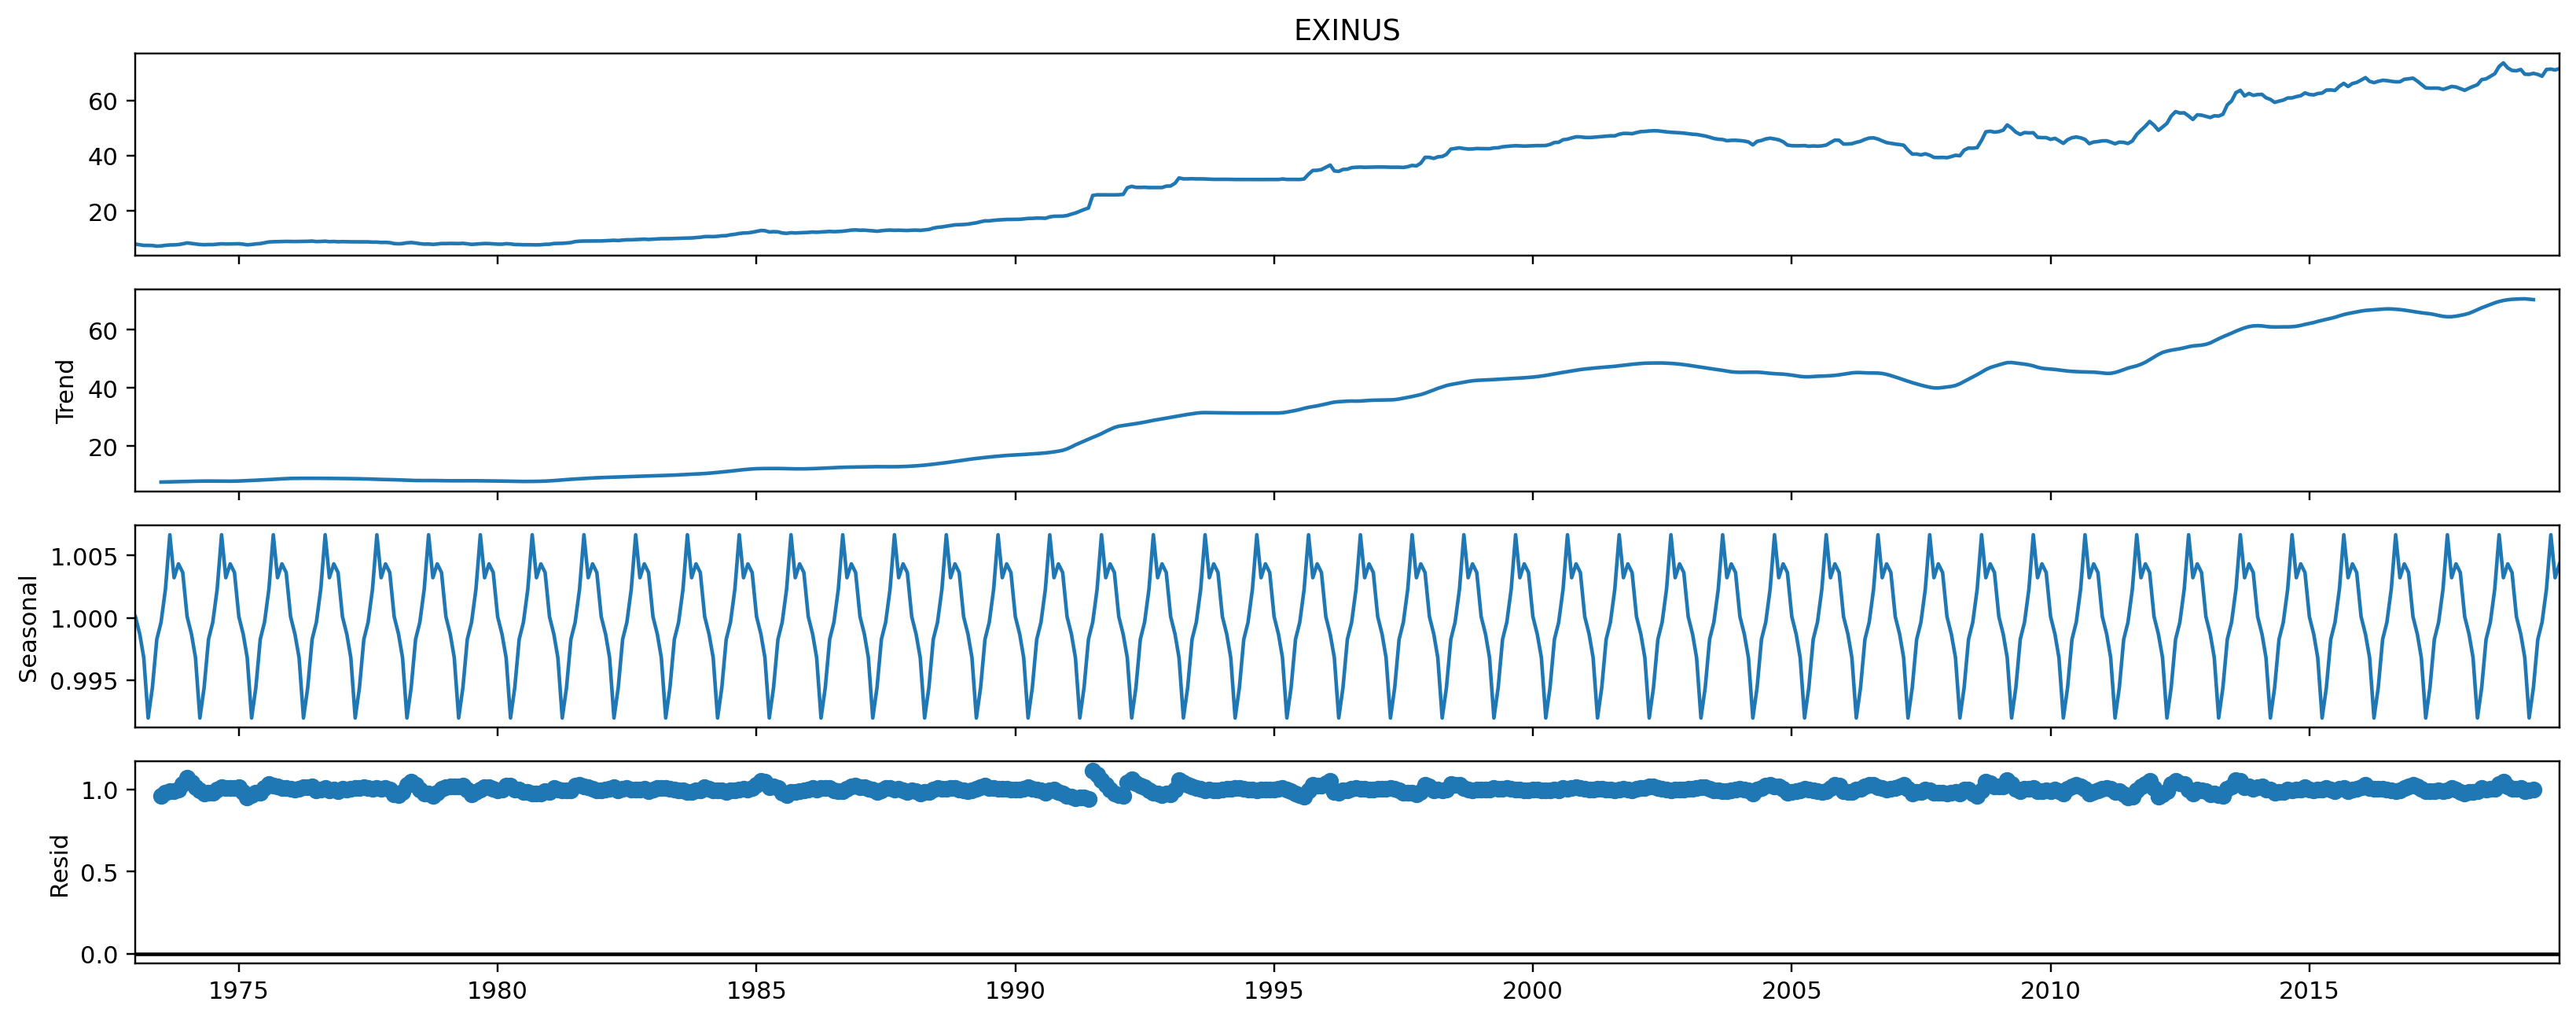

In [66]:
result_multiplicative = seasonal_decompose(df['EXINUS'], model='mul')
result_multiplicative.plot()